100 / 200
(1600, 2048, 3)


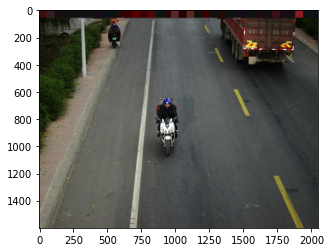

'input.jpg'

In [3]:
import os
import cv2
from  matplotlib import pyplot as plt
import shutil
%matplotlib inline

def show_img(img_path):
    im = cv2.imread(img_path,1)
    print(im.shape)
    im_ = im[:,:,::-1]
    plt.close()
    plt.imshow(im_)
    plt.show()

IMG_PATH = '/home/data/20'
files_list = os.listdir(IMG_PATH)
imgs_list = []
for file in files_list:
    if file.endswith('.jpg'):
        imgs_list.append(os.path.splitext(file)[0])
print(len(imgs_list),'/',len(files_list))

img = imgs_list[1]
show_img(os.path.join(IMG_PATH, img +'.jpg'))
shutil.copy(os.path.join(IMG_PATH, img +'.jpg'), 'input.jpg')

save img to  output.jpg
(1600, 2048, 3)


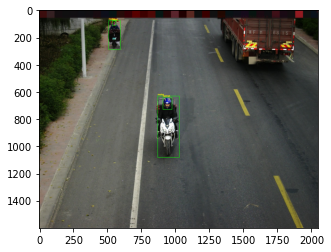

In [4]:
import xml.etree.ElementTree as ET
def show_xml(origin_dir, oriname, target):
    img_file = os.path.join(origin_dir, oriname + '.jpg')
    im = cv2.imread(img_file)

    xml_file = os.path.join(origin_dir, oriname + '.xml')  # 读取每个原图像的xml文件
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for _object in root.findall('object'):
        object_name = _object.find('name').text
        if not _object.find('bndbox'):
            continue
        Xmin = int(float(_object.find('bndbox').find('xmin').text))
        Ymin = int(float(_object.find('bndbox').find('ymin').text))
        Xmax = int(float(_object.find('bndbox').find('xmax').text))
        Ymax = int(float(_object.find('bndbox').find('ymax').text))
        color = (4, 250, 7)
        cv2.rectangle(im, (Xmin, Ymin), (Xmax, Ymax), color, 2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(im, object_name, (Xmin, Ymin - 7), font, 0.5, (6, 230, 230), 2)
        # cv2.imshow('01', im)

    img_name = oriname + '.jpg'
    # to_name = os.path.join(target_dir, img_name)
    to_name = target
    cv2.imwrite(to_name, im)
    print('save img to ',to_name)
    return to_name
    
target = 'output.jpg'
save_path = show_xml(IMG_PATH, img, target)
show_img(save_path)